In [296]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, scale
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import hypertools as hyp
%matplotlib inline

In [297]:
path = 'C:\\input\\datahackhour\\' #'/mnt/c/input/datahackhour/'
train = pd.read_csv(path + 'Train_vzbNH27.csv')
test = pd.read_csv(path + 'Test_MbjGElR.csv')
print(train.shape)
print(test.shape)

(28937, 19)
(12251, 18)


In [298]:
train.head()

,ID,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day_Of_Week,Campaign,Pdays,Previous,Poutcome,Emp.Var.Rate,Cons.Price.Idx,Cons.Conf.Idx,Outcome
0,1,56,housemaid,married,Other,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,3,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,5,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,6,45,services,married,Other,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no


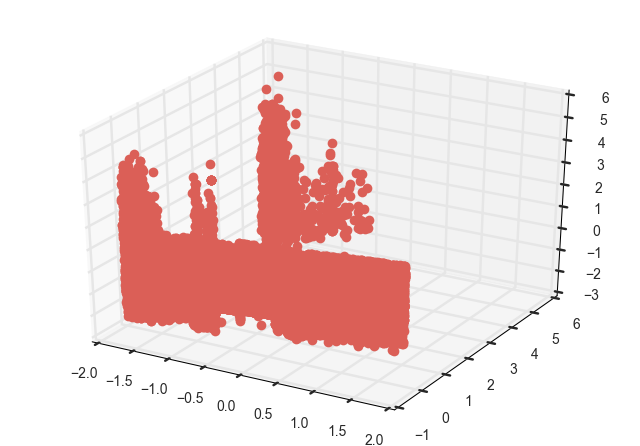

In [299]:
hyp.plot(train, 'o')

# imputing

In [300]:
train['Job'] = train["Job"].fillna(train['Job'].mode()[0])
train['Marital'] = train["Marital"].fillna(train['Marital'].mode()[0])
train['Education'] = train["Education"].fillna(train['Education'].mode()[0])
train['Default'] = train["Default"].fillna(train['Default'].mode()[0])
train['Housing'] = train["Housing"].fillna(train['Housing'].mode()[0])
train['Loan'] = train["Loan"].fillna(train['Loan'].mode()[0])
train['Contact'] = train["Contact"].fillna(train['Contact'].mode()[0])
train['Month'] = train["Month"].fillna(train['Month'].mode()[0])
train['Day_Of_Week'] = train["Day_Of_Week"].fillna(train['Day_Of_Week'].mode()[0])
train['Poutcome'] = train["Poutcome"].fillna(train['Poutcome'].mode()[0])
train['Outcome'] = train["Outcome"].fillna(train['Outcome'].mode()[0])

In [301]:
test['Job'] = test["Job"].fillna(test['Job'].mode()[0])
test['Marital'] = test["Marital"].fillna(test['Marital'].mode()[0])
test['Education'] = test["Education"].fillna(test['Education'].mode()[0])
test['Default'] = test["Default"].fillna(test['Default'].mode()[0])
test['Housing'] = test["Housing"].fillna(test['Housing'].mode()[0])
test['Loan'] = test["Loan"].fillna(test['Loan'].mode()[0])
test['Contact'] = test["Contact"].fillna(test['Contact'].mode()[0])
test['Month'] = test["Month"].fillna(test['Month'].mode()[0])
test['Day_Of_Week'] = test["Day_Of_Week"].fillna(test['Day_Of_Week'].mode()[0])
test['Poutcome'] = test["Poutcome"].fillna(test['Poutcome'].mode()[0])

In [302]:
le = LabelEncoder()

In [303]:
train['Job'] = le.fit_transform(train['Job'])
test['Job'] = le.fit_transform(test['Job'])

In [304]:
train['Marital'] = le.fit_transform(train['Marital'])
test['Marital'] = le.fit_transform(test['Marital'])

In [305]:
train['Education'] = le.fit_transform(train['Education'])
test['Education'] = le.fit_transform(test['Education'])

In [306]:
train['Default'] = le.fit_transform(train['Default'])
test['Default'] = le.fit_transform(test['Default'])

In [307]:
train['Housing'] = le.fit_transform(train['Housing'])
test['Housing'] = le.fit_transform(test['Housing'])

In [308]:
train['Loan'] = le.fit_transform(train['Loan'])
test['Loan'] = le.fit_transform(test['Loan'])

In [309]:
train['Contact'] = le.fit_transform(train['Contact'])
test['Contact'] = le.fit_transform(test['Contact'])

In [310]:
train['Month'] = le.fit_transform(train['Month'])
test['Month'] = le.fit_transform(test['Month'])

In [311]:
train['Day_Of_Week'] = le.fit_transform(train['Day_Of_Week'])
test['Day_Of_Week'] = le.fit_transform(test['Day_Of_Week'])

In [312]:
train['Poutcome'] = le.fit_transform(train['Poutcome'])
test['Poutcome'] = le.fit_transform(test['Poutcome'])

In [313]:
train['Outcome'] = le.fit_transform(train['Outcome'])

## Finding most correleted variables using PCA 

In [314]:
pca = PCA(n_components=17)
pca.fit_transform(train.iloc[:,1:18].values)

array([[ -3.65758512e+01,   1.63473532e+01,   3.07982160e+00, ...,
         -1.05360067e-01,   8.43461625e-03,  -7.38868541e-05],
       [ -3.66076746e+01,  -2.64273008e+00,   4.69695009e+00, ...,
         -7.96850772e-02,   4.77956478e-03,  -8.56605724e-06],
       [ -3.65736147e+01,   1.63043337e+01,   3.47287243e+00, ...,
         -1.06829260e-01,   8.65745754e-03,  -9.92537500e-05],
       ..., 
       [ -3.66189201e+01,   5.36082462e+00,  -1.07737130e+01, ...,
          1.20277612e+00,  -1.42990592e-01,   1.60984131e-04],
       [ -3.65992246e+01,   1.52932025e+01,  -1.10459318e+01, ...,
          1.18800043e+00,  -1.48860929e-01,   1.60986416e-04],
       [ -3.65672620e+01,   3.32626080e+01,  -1.22864325e+01, ...,
          9.79344322e-01,  -3.27827039e-01,   1.27183561e-04]])

In [315]:
var= pca.explained_variance_ratio_

In [316]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [317]:
var1

array([  99.53,   99.84,   99.9 ,   99.94,   99.96,   99.98,   99.99,
        100.  ,  100.01,  100.01,  100.01,  100.01,  100.01,  100.01,
        100.01,  100.01,  100.01])

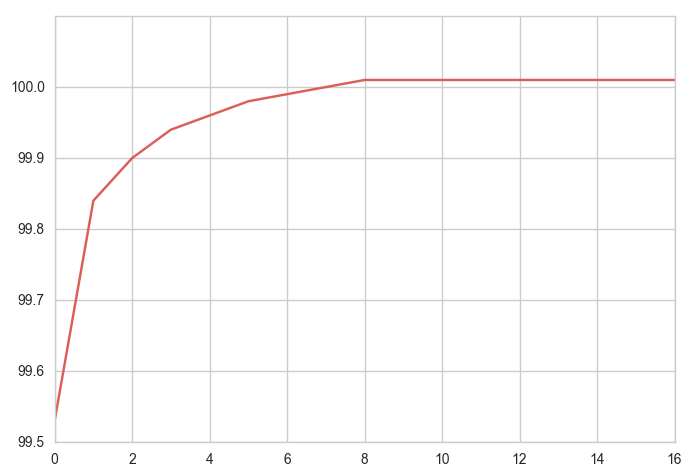

In [318]:
plt.plot(var1)

### Looking at above i'm going to reduce variables

In [319]:
last_idx = 14

### Remove columns

In [320]:
cols = [5, 6, 13, 4]
train = train.drop(train.columns[cols], axis=1)
test = test.drop(test.columns[cols], axis=1)

In [321]:
train_x = train.iloc[:,1:last_idx].values.astype(np.float)
train_y = train.iloc[:,last_idx].values.astype(np.float)

In [322]:
test_x = test.iloc[:,1:last_idx].values.astype(np.float)

In [323]:
pca = PCA(n_components=8)
pca.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [324]:
train_x_pca = pca.fit_transform(train_x)

In [325]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, train_size=0.7, random_state=37)

In [331]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV
clf = xgb.XGBClassifier(max_depth= 5, learning_rate= 0.05, subsample= 0.8, colsample_bytree= 1.0, n_estimators= 75)
clf.fit(X_train, y_train)
print(clf)
print(accuracy_score(y_test, clf.predict(X_test)))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1.0,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=75, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)
0.895530983644


In [332]:
predictors = [x for x in train.columns if x not in ['ID', 'Outcome']]

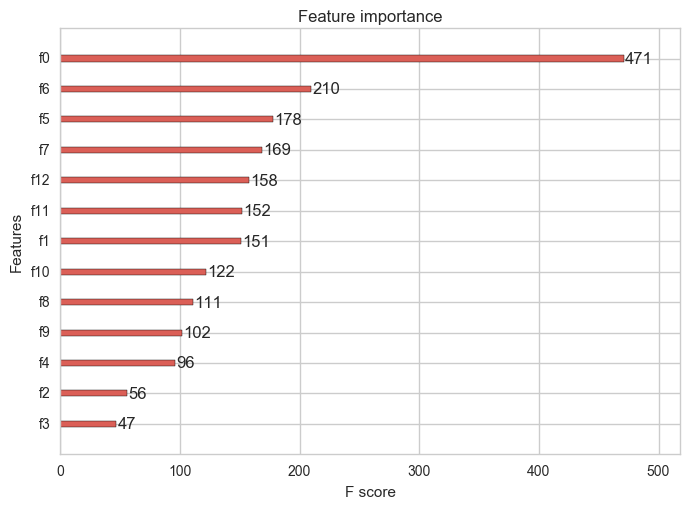

In [333]:
xgb.plot_importance(clf)
plt.show()

In [334]:
test_x_pca = pca.fit_transform(test_x)
pred = clf.predict(test_x)

In [335]:
result = pd.DataFrame(columns=['ID', 'Outcome'])
result.ID = test['ID']
result.Outcome = pred
result.Outcome = result.Outcome.astype(int)
result['Outcome'] = le.inverse_transform(result['Outcome'])
result.to_csv('result.csv', index=False)

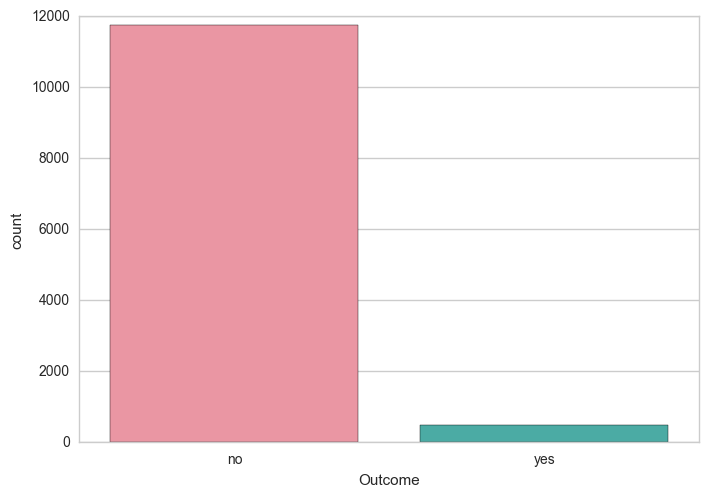

In [336]:
sns.countplot(x='Outcome', data=result)

In [337]:
    from sklearn.model_selection import GridSearchCV
    parameters = {
        'n_estimators': [70, 75, 80],
        'learning_rate': [0.04, 0.05, 0.6],
        'max_depth': [4, 5, 6],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }
    clf = xgb.XGBClassifier(nthread=4, silent=0)
    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=2)
    
    clf.fit(X_train, y_train)
    best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
    print(best_parameters)
    print('score:', score)
    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))
    #print('predicted:', clf.predict([[1,1]]))


{'subsample': 0.9, 'colsample_bytree': 1.0, 'max_depth': 5, 'learning_rate': 0.04, 'n_estimators': 80}
score: 0.900469019995
colsample_bytree: 1.0
learning_rate: 0.04
max_depth: 5
n_estimators: 80
subsample: 0.9


C:\Users\priti\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
